In [23]:
# importing the required libraries
# make sure these packaages are installed :
import pandas as pd  #pip install pandas
import cv2 #pip install opencv-python OR pip install opencv-contrib-python
import matplotlib.pyplot as plt #pip install matplotlib

In [24]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"   # SSD MobileNetv3 configuration file
frozen_model = "frozen_inference_graph.pb" # Frozen model graph

In [25]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)


In [26]:
classlabels = []  # empty python list
file_name = "labels.txt"
with open(file_name,'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [27]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [28]:
print(len(classlabels))

80


In [29]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)  # 255/2  255 being the highest 
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001F30D1EEF30>

## Reading an Image

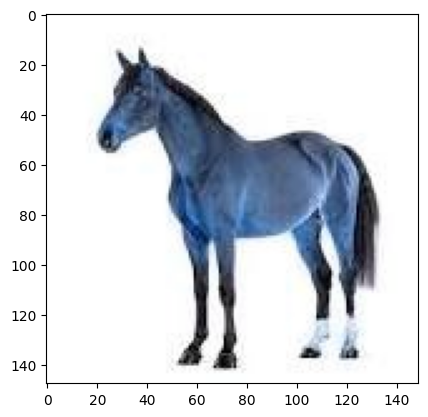

In [30]:
img = cv2.imread("download.jpg")
plt.imshow(img)   #

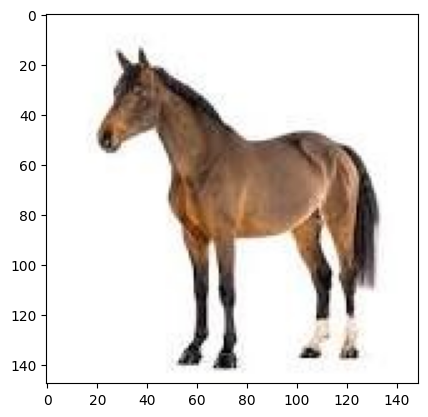

In [31]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [32]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [33]:
print(ClassIndex)

[19]


In [34]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip (ClassIndex. flatten (), confidence. flatten(), bbox):
    #cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1) 
    cv2.rectangle(img, boxes, (255, 0, 0), 1)
    cv2.putText(img, classlabels [ClassInd-2], (boxes[0]+5, boxes [1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=2)

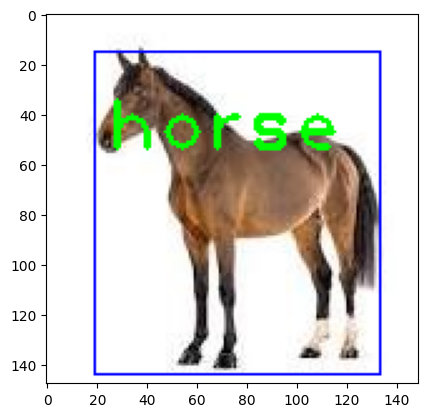

In [35]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

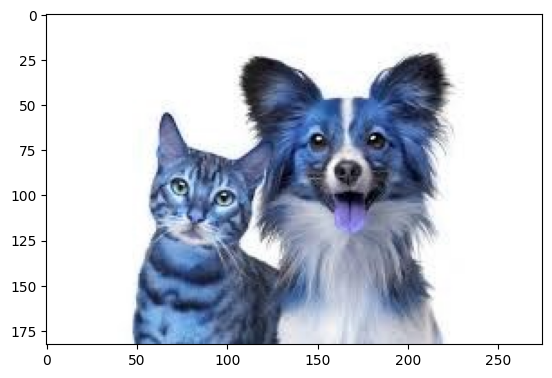

In [36]:
img2 = cv2.imread("cat_dog.jpg")
plt.imshow(img2) 

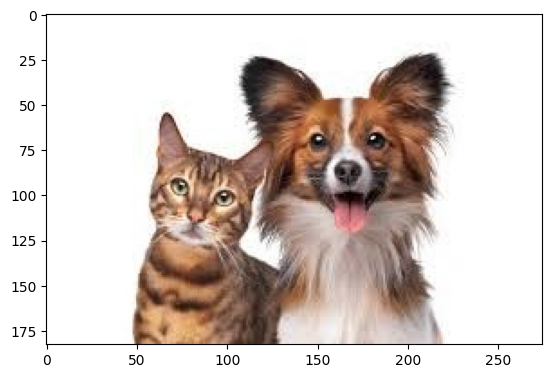

In [37]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [38]:
ClassIndex, confidence, bbox = model.detect(img2,confThreshold=0.5)

In [39]:
print(ClassIndex)

[17 18]


In [40]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip (ClassIndex. flatten (), confidence. flatten(), bbox):
    #cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1) 
    cv2.rectangle(img2, boxes, (255, 0, 0), 1)
    cv2.putText(img2, classlabels [ClassInd-2], (boxes[0]+5, boxes [1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=2)

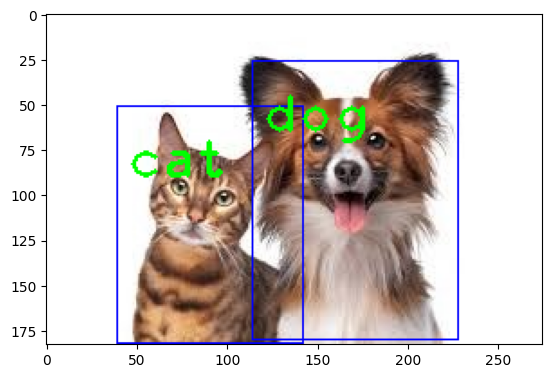

In [41]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [42]:
#function creation for object detection in an image

def Objectimage(img):
    plt.imshow(img)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)
    print(ClassIndex)
    font_scale = 2
    font = cv2.FONT_HERSHEY_PLAIN
    for ClassInd, conf, boxes in zip (ClassIndex. flatten (), confidence. flatten(), bbox):
    #cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1) 
        cv2.rectangle(img, boxes, (255, 0, 0), 1)
        cv2.putText(img, classlabels [ClassInd-1], (boxes[0]+5, boxes [1]+40), font, fontScale=font_scale, color=(0, 255, 0), thickness=2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

[3 1]


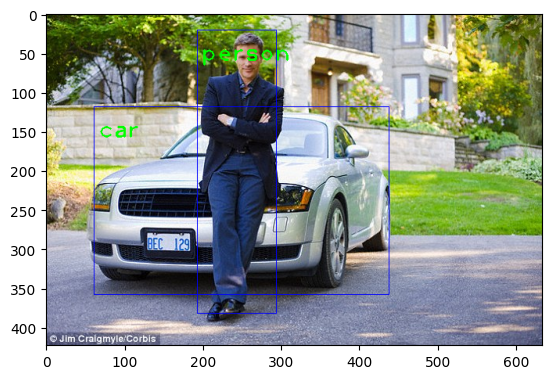

In [44]:
img3 = cv2.imread("person_car.jpg")
Objectimage(img3)

### Below code is for Object Detection in a video, clone the repo to see the results

In [ ]:
cap = cv2.VideoCapture ("testing_video.mp4")


# Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")


font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect (frame, confThreshold=0.55)
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex. flatten (), confidence. flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classlabels [ClassInd-1], (boxes[0]+10, boxes[1]+48), font, fontScale = font_scale, color=(0, 255, 0), thickness=2)
    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(2) & 0xFF== ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1 28]
[1 1 1 1 1 1 1 1 1 1 1 1 1]
[ 1  1  1  1  1  1  1  1  1  1  1 28]
[ 1  1  1 28  1  1  1]
[ 1 31  1  1 28]
[ 1  1  1 31  1  1]
[1 1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1 1 1 1]
[1 1 1 6 1 1]
[1 1 1 1]
[ 1 28  6  1  1]
[ 1  1 28  1  1]
[ 1  1  1 28  1]
[ 1  1  1 28 85]
[ 1 28  1]
[ 1 28  1  1  1  3  1]
[28  1  1  1  1]
[ 1  3 28  1  1  8]
[28  1  1  8  1  6]
[ 1  1 28  3 10]
[ 1  1 28]
[ 1  1 28]
[ 1  1 31]
[1 1]
[1 1 1]
[ 1 28  1]
[ 1 28  1  1]
[ 1 28  1  1]
[ 1 28  1  1]
[ 1  1 28]
[ 1 28  1  1]
[ 1 28 85  1  1  1  1  1  1  1]
[ 1 28  1  1  1 85  1  1]
[ 1 28  1  1 85  1  1]
[ 1 28  1  1  1  1]
[28  1  1  1  1  6]
[28  1  1  1  1  1]
[28  1  1  1  1  1  1]
[28  1  1  1  1  1]
[28  1  1  1  1]
[28  1  1  1  1]
[28  1  1  1  1  1]
[28  1  1  1  1  1]
[28  1  1  1  1  1  1  1]
[ 1 28  1  1  1]
[28  1  1  1  1]
[85 28  1  1]
[28 85  1]
[28]
[28  1]
[28  1]
[28 85  1  1 28]
[85 28  

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


### Uncomment the below code to use your Webcam and try object detection in real-time

In [ ]:
# cap = cv2.VideoCapture ("1")


# # Check if the video is opened correctly
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("Cannot open video")


# font_scale = 3
# font = cv2.FONT_HERSHEY_PLAIN

# while True:
#     ret, frame = cap.read()
#     ClassIndex, confidece, bbox = model.detect (frame, confThreshold=0.55)
#     print(ClassIndex)
#     if (len(ClassIndex)!=0):
#         for ClassInd, conf, boxes in zip(ClassIndex. flatten (), confidece. flatten(), bbox):
#             if (ClassInd<=80):
#                 cv2.rectangle(frame, boxes, (255, 0, 0), 2)
#                 cv2.putText(frame, classlabels [ClassInd-1], (boxes[0]+10, boxes[1]+48), font, fontScale = font_scale, color=(0, 255, 0), thickness=2)
#     cv2.imshow('Object Detection', frame)
#     if cv2.waitKey(2) & 0xFF== ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

[1]
[ 1 70]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1 1]
[1 1]
[1]
[1]
[1 1]
[1 1]
[1 1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1 1]
[1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[ 1 70]
[ 1 70]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


KeyboardInterrupt: 

: 